### sample one - modual one

In [2]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_one import backtest_strategy
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_one
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_one(
    df_original=df_original,
    backtest_func=backtest_strategy,
    performance_func=calculate_strategy_performance,
    param_ranges={
        'ma_period': (10, 15),
        'bb_period': (20, 40),
        'bb_std': (1.0, 3.0),
        'drop_threshold': (0.5, 0.8)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,ma_period,bb_period,bb_std,drop_threshold,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,15,33,1.83,0.68,521.0,521.0,217.0,938.0,-417.0,21,12,9,57.14%,233.0,-129.0,78.166667,-46.333333,1.687050,4,4
1,13,36,2.86,0.58,110.0,110.0,29.0,110.0,0.0,1,1,0,100.00%,110.0,0.0,110.000000,0.000000,inf,1,0
2,13,21,2.18,0.64,201.0,201.0,110.0,425.0,-224.0,14,7,7,50.00%,110.0,-47.0,60.714286,-32.000000,1.897321,3,2
3,12,27,2.72,0.52,43.0,43.0,29.0,43.0,0.0,2,2,0,100.00%,32.0,0.0,21.500000,0.000000,inf,2,0
4,12,28,2.07,0.73,356.0,356.0,110.0,413.0,-57.0,14,10,4,71.43%,92.0,-22.0,41.300000,-14.250000,2.898246,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,12,26,2.55,0.58,70.0,70.0,37.0,107.0,-37.0,5,3,2,60.00%,64.0,-35.0,35.666667,-18.500000,1.927928,2,2
496,13,37,2.83,0.54,110.0,110.0,29.0,110.0,0.0,1,1,0,100.00%,110.0,0.0,110.000000,0.000000,inf,1,0
497,15,23,1.00,0.52,908.0,818.0,956.0,3119.0,-2301.0,61,22,39,36.07%,523.0,-183.0,141.772727,-59.000000,2.402928,3,6
498,12,33,1.76,0.71,335.0,335.0,333.0,922.0,-587.0,25,11,14,44.00%,248.0,-129.0,83.818182,-41.928571,1.999071,4,6


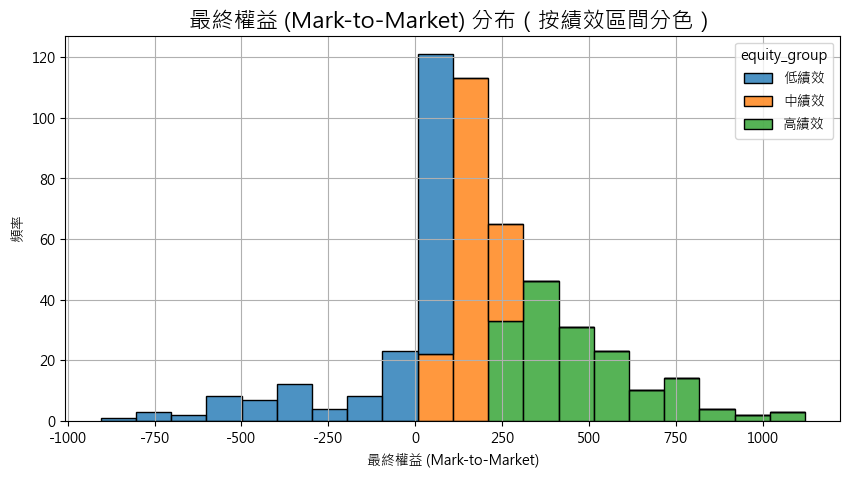

不同績效區間的策略參數中位數：


,bb_period,bb_std,drop_threshold
equity_group,,,
低績效,32.0,2.51,0.65
中績效,30.0,2.36,0.64
高績效,26.0,1.75,0.65


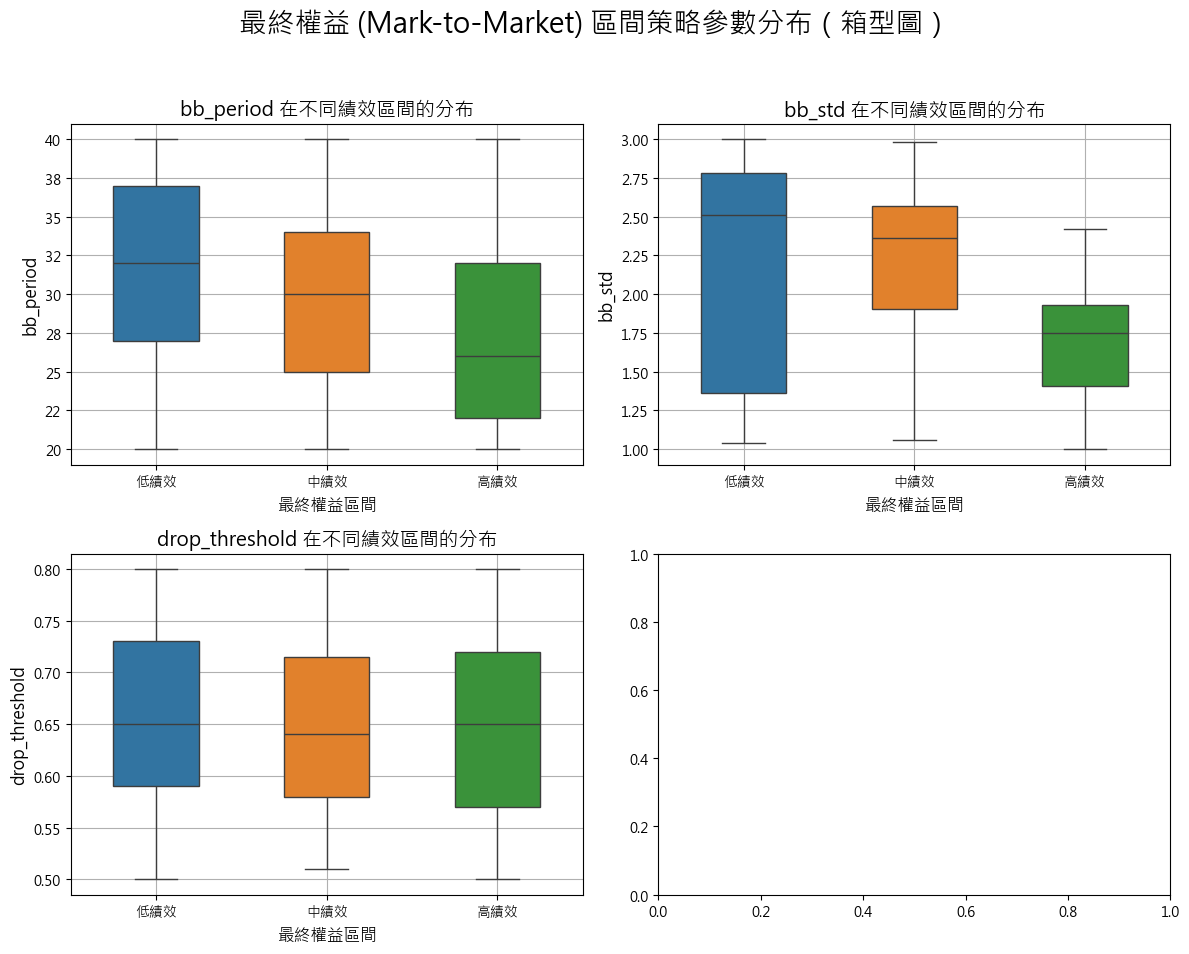

In [4]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['bb_period','bb_std','drop_threshold'],
    group_labels=['低績效','中績效','高績效'],
)


### sample one - moduel two

In [5]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_two import backtest_strategy_two
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_two
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_two(
    df_original=df_original,
    backtest_func=backtest_strategy_two,
    performance_func=calculate_strategy_performance,
    param_ranges = {
        'short_ma_period': (3, 10),
        'long_ma_period': (5, 20)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,short_ma_period,long_ma_period,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,9,12,1775.0,1759.0,605.0,4120.0,-2361.0,57,34,23,59.65%,420.0,-221.0,121.176471,-102.652174,1.180457,7,3
1,7,15,1095.0,1079.0,639.0,2651.0,-1572.0,46,27,19,58.70%,357.0,-205.0,98.185185,-82.736842,1.186717,6,3
2,6,15,353.0,337.0,885.0,2531.0,-2194.0,51,25,26,49.02%,301.0,-248.0,101.240000,-84.384615,1.199745,3,5
3,6,15,353.0,337.0,885.0,2531.0,-2194.0,51,25,26,49.02%,301.0,-248.0,101.240000,-84.384615,1.199745,3,5
4,7,20,478.0,478.0,919.0,1908.0,-1430.0,36,19,17,52.78%,333.0,-298.0,100.421053,-84.117647,1.193817,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,8,593.0,550.0,888.0,3627.0,-3077.0,78,36,42,46.15%,471.0,-263.0,100.750000,-73.261905,1.375203,6,6
496,6,17,-8.0,-24.0,875.0,1852.0,-1876.0,47,23,24,48.94%,271.0,-298.0,80.521739,-78.166667,1.030129,5,4
497,3,17,2258.0,2215.0,278.0,3195.0,-980.0,49,29,20,59.18%,324.0,-169.0,110.172414,-49.000000,2.248417,6,3
498,5,17,1318.0,1302.0,558.0,3060.0,-1758.0,47,25,22,53.19%,332.0,-248.0,122.400000,-79.909091,1.531741,3,4


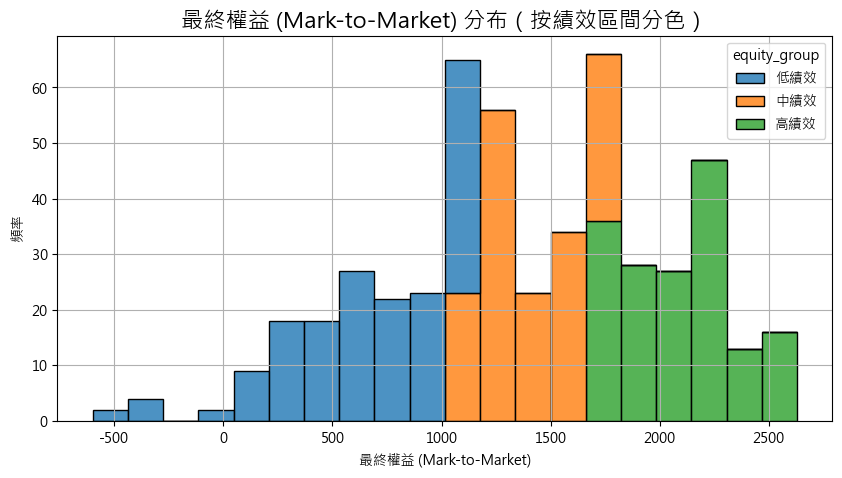

不同績效區間的策略參數中位數：


,short_ma_period,long_ma_period
equity_group,,
低績效,7.0,18.0
中績效,5.0,13.5
高績效,7.0,12.0


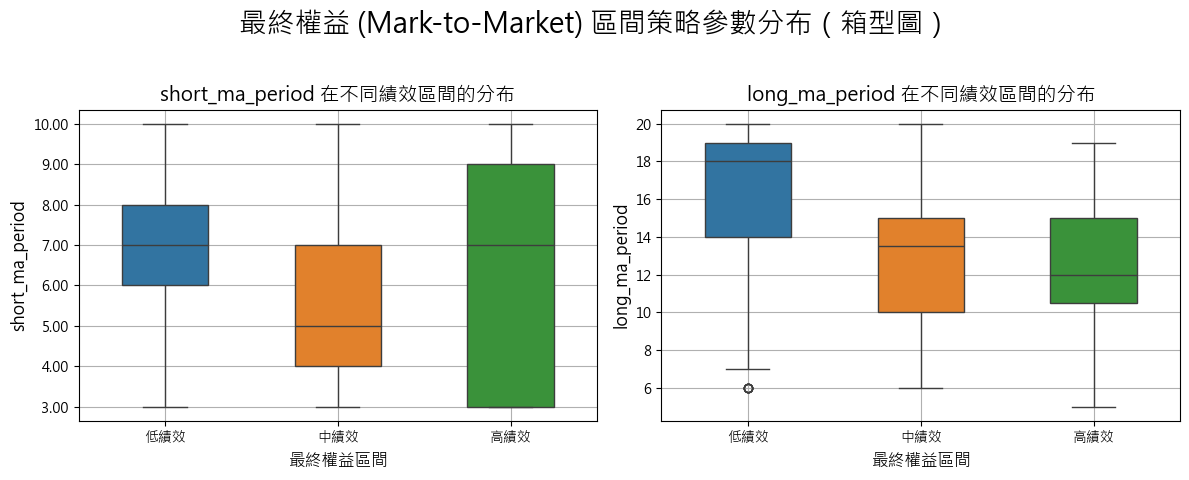

In [6]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['short_ma_period','long_ma_period'],
    group_labels=['低績效','中績效','高績效'],
    subplot_shape=(1, 2)
)


### sample one - module three

In [5]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_three import backtest_strategy_three
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_three
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_three(
    df_original=df_original,
    backtest_func=backtest_strategy_three,
    performance_func=calculate_strategy_performance,
    param_ranges = {
        'ma_short': (1, 10),
        'ma_medium': (4, 15),
        'ma_long': (8, 20)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,ma_short,ma_medium,ma_long,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,3,9,12,709.0,693.0,1233.0,4491.0,-3798.0,61,29,32,47.54%,883.0,-347.0,154.862069,-118.687500,1.304788,4,4
1,3,9,17,224.0,246.0,1530.0,3006.0,-2760.0,56,27,29,48.21%,580.0,-347.0,111.333333,-95.172414,1.169807,3,7
2,7,13,16,372.0,356.0,1636.0,2959.0,-2603.0,48,23,25,47.92%,637.0,-327.0,128.652174,-104.120000,1.235614,7,5
3,4,5,15,1462.0,1446.0,906.0,5269.0,-3823.0,107,55,52,51.40%,362.0,-347.0,95.800000,-73.519231,1.303060,8,5
4,4,8,11,126.0,83.0,1569.0,4472.0,-4389.0,65,30,35,46.15%,902.0,-352.0,149.066667,-125.400000,1.188729,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,8,13,129.0,151.0,1118.0,4731.0,-4580.0,91,32,59,35.16%,803.0,-205.0,147.843750,-77.627119,1.904537,3,7
496,5,9,11,-1097.0,-1113.0,2130.0,4048.0,-5161.0,65,29,36,44.62%,842.0,-470.0,139.586207,-143.361111,0.973669,3,7
497,7,10,17,485.0,507.0,889.0,3452.0,-2945.0,62,35,27,56.45%,497.0,-367.0,98.628571,-109.074074,0.904235,5,3
498,1,9,19,264.0,174.0,1078.0,3794.0,-3620.0,82,30,52,36.59%,472.0,-298.0,126.466667,-69.615385,1.816648,4,9


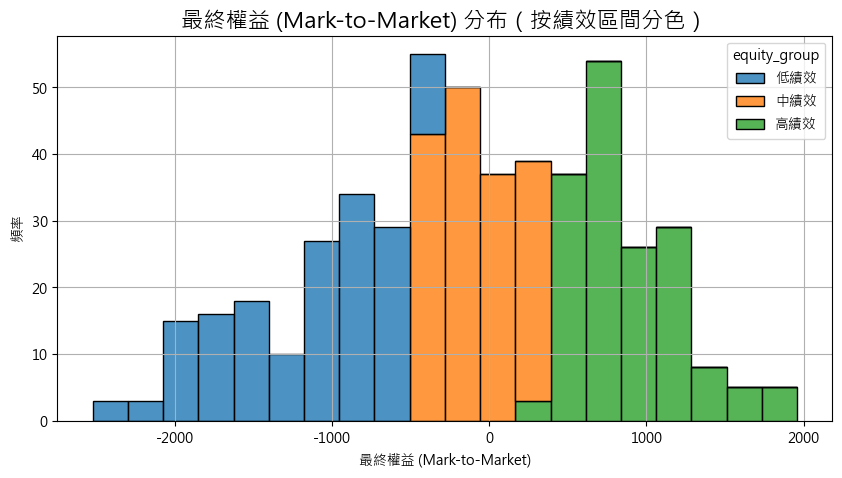

不同績效區間的策略參數中位數：


,ma_short,ma_medium,ma_long
equity_group,,,
低績效,5.0,12.0,17.0
中績效,5.0,11.0,16.0
高績效,2.0,8.0,14.0


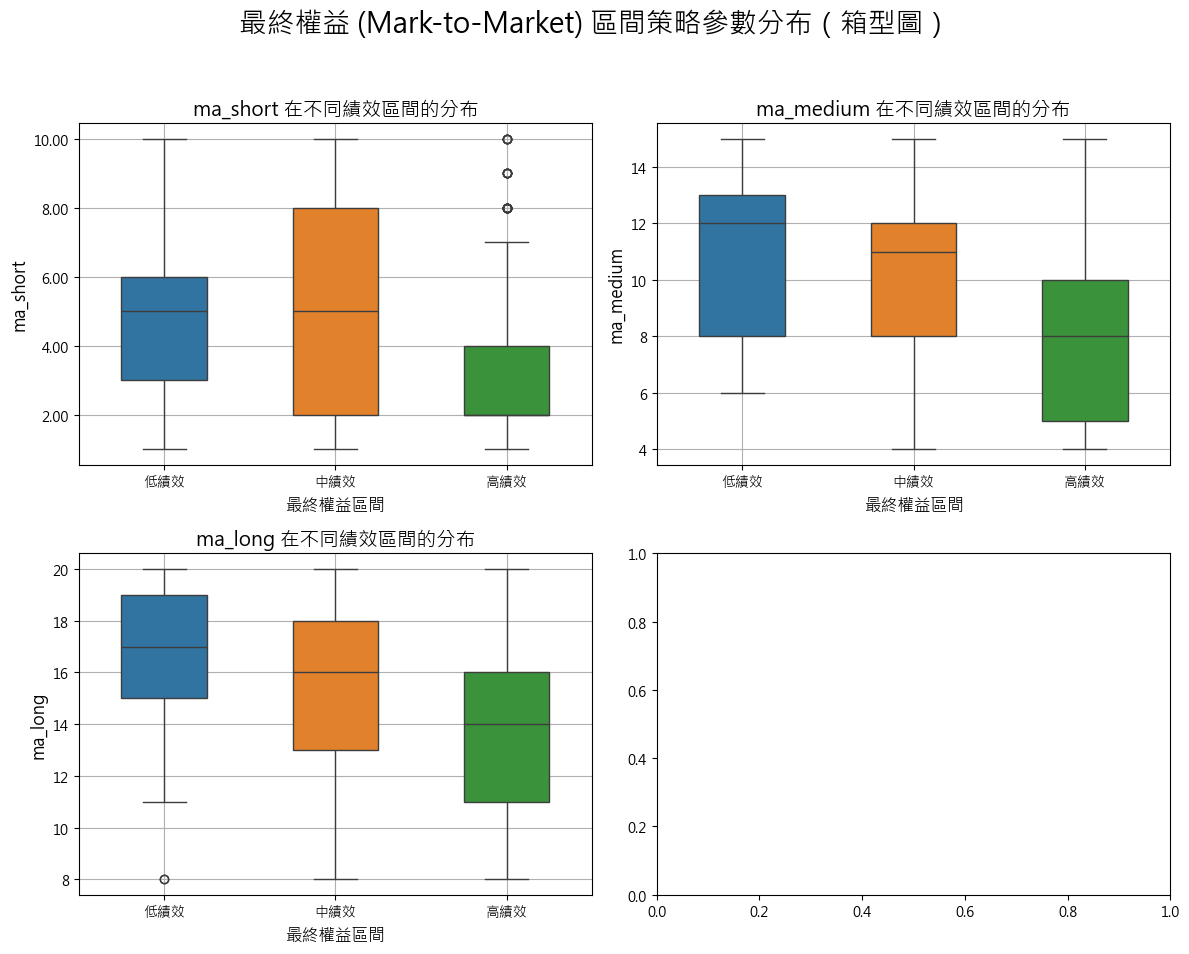

In [6]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['ma_short','ma_medium','ma_long'],
    group_labels=['低績效','中績效','高績效'],
    subplot_shape=(2, 2)
)


### sample one - module four

In [1]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_four import backtest_strategy_four
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_four
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_four(
    df_original=df_original,
    backtest_func=backtest_strategy_four,
    performance_func=calculate_strategy_performance,
    param_ranges = {
        'bb_period': (5, 20),
        'bb_std': (1.0, 3.0),
        'ma_long_period': (5, 20)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,bb_period,bb_std,ma_long_period,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,12,1.81,19,1705.656094,1705.656094,287.000000,2014.729399,-309.073304,13,11,2,84.62%,248.618390,-248.550839,183.157218,-154.536652,1.185202,6,1
1,13,1.20,18,2253.861152,2253.861152,384.000000,3085.122041,-831.260889,30,23,7,76.67%,292.768940,-308.704801,134.135741,-118.751556,1.129549,6,1
2,13,2.53,12,382.894755,382.894755,69.000000,382.894755,0.000000,2,2,0,100.00%,228.289576,0.000000,191.447377,0.000000,inf,2,0
3,10,2.05,11,599.229764,599.229764,354.000000,599.229764,0.000000,4,4,0,100.00%,197.758274,0.000000,149.807441,0.000000,inf,4,0
4,17,1.26,15,813.625227,813.625227,195.000000,913.338654,-99.713427,7,6,1,85.71%,202.104972,-99.713427,152.223109,-99.713427,1.526606,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18,2.41,13,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.00%,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
496,16,2.17,6,596.280605,596.280605,117.000000,596.280605,0.000000,3,3,0,100.00%,226.546625,0.000000,198.760202,0.000000,inf,3,0
497,13,1.38,7,3744.983514,3744.983514,388.784642,4512.730792,-767.747278,36,29,7,80.56%,302.130529,-224.201243,155.611407,-109.678183,1.418800,10,2
498,6,2.22,6,2265.152434,2026.623782,607.182900,3033.129452,-1006.505670,24,19,5,79.17%,755.289774,-405.952238,159.638392,-201.301134,0.793033,7,1


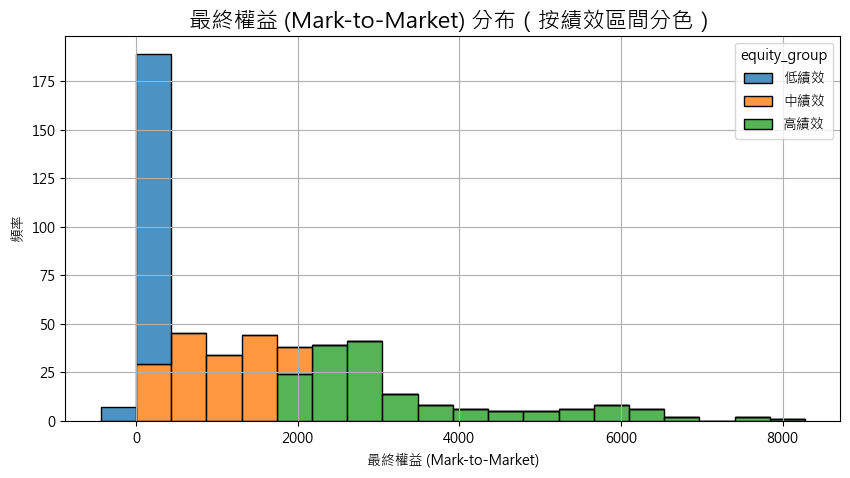

不同績效區間的策略參數中位數：


,bb_period,bb_std,ma_long_period
equity_group,,,
低績效,17.0,2.41,14.0
中績效,12.0,2.07,12.0
高績效,8.0,1.59,12.0


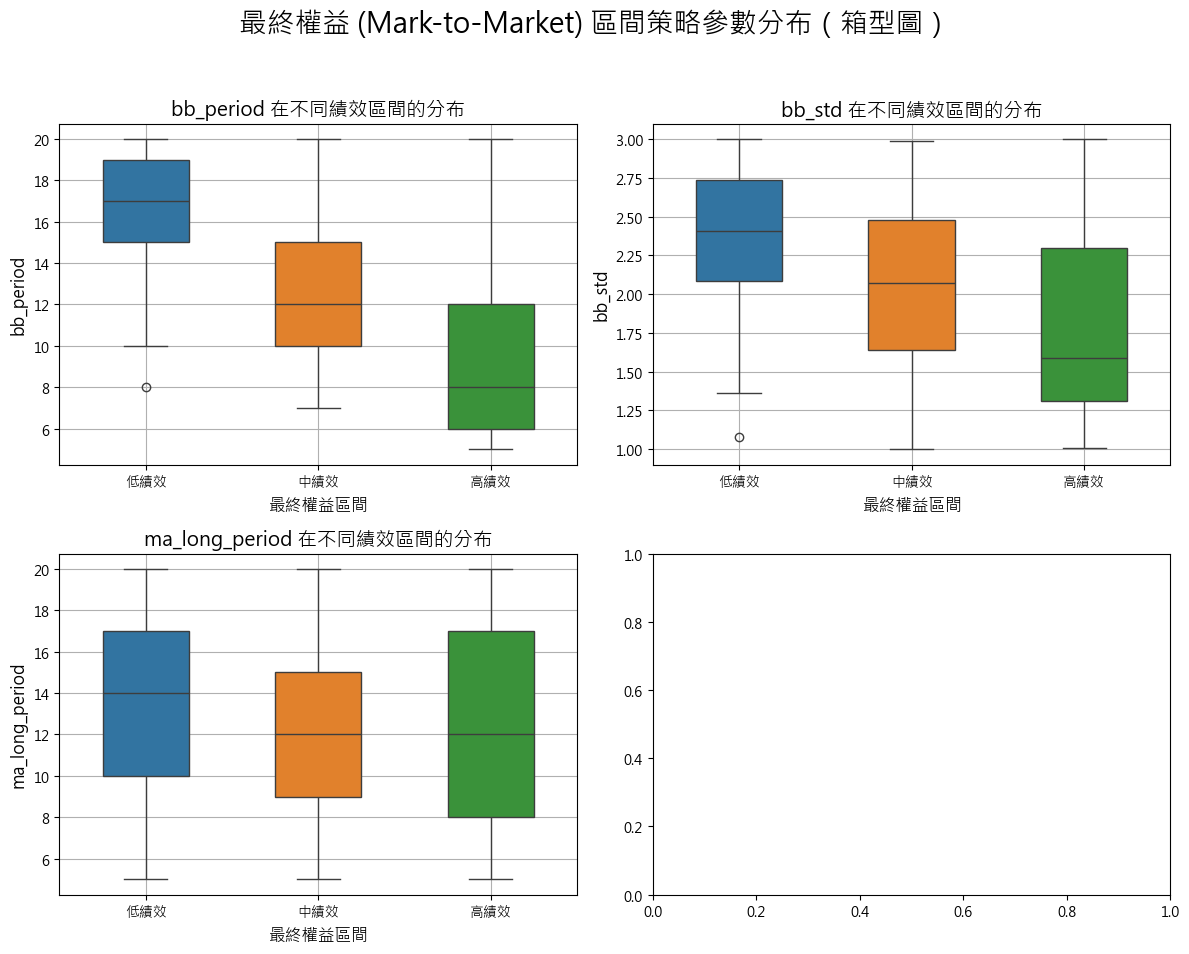

In [3]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['bb_period','bb_std','ma_long_period'],
    group_labels=['低績效','中績效','高績效'],
    subplot_shape=(2, 2)
)
